<a href="https://colab.research.google.com/github/yashwanth-kokkanti/regressionExample/blob/main/simpleRegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Regression ML Example

''' This tutorial is intended to demonstrate through all the major steps involved in completing an and-to-end Machine Learning project '''

### Major Steps Involved 

''' 
Pre-requisites and Resources
Data Collection and Problem Statement
Exploratory Data Analysis with Pandas and NumPy
Data Preparation using Sklearn
Selecting and Training a few Machine Learning Models
Cross-Validation and Hyperparameter Tuning using Sklearn
''' 

## Data: Auto MPG dataset taken from UCI repository: 
''' The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes '''



' The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes '

In [2]:
## Lets start with imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
## Get data and define columns 

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('/content/auto-mpg.data', names=cols, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

data = df.copy()

In [4]:
data.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
## MPG : Miles Per Gallon is the continuous independant variable to be determined. 

In [6]:
## Lets do Some EDA 

data.info()

## There are null values for HorseoPower 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
data.isnull().sum() 
## HorsePower contains 6 null values and is a float value. So need to imputed with Mean or median or mode

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

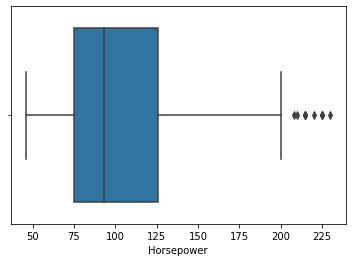

In [8]:
## Check for any outliers in HorsePOwer column



sns.boxplot(x=data['Horsepower']) 

## There are a few outliers 

(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <a list of 10 Patch objects>)

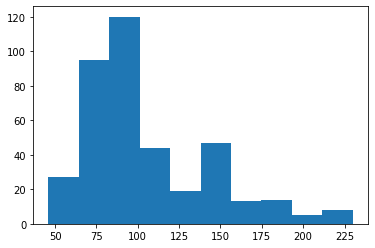

In [9]:
plt.hist(data['Horsepower']) ## Clearly it is not normally distributed and a little skew towards right and there are values beyond 200 HP

In [10]:
## Since there are few outliers , let us go with the median imputation. 

data['Horsepower'] = data['Horsepower'].fillna(data['Horsepower'].median())

data.isnull().sum()

## Missing values are removed now

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
## Let us explore categorical variables . In data Cylinders, origin represents cateogrical data. 

print (data["Cylinders"].value_counts() )
data['Origin'].value_counts()

## This explains about the categories of Cylinders and Origin columns and how many values are present in it . 

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64


1    249
3     79
2     70
Name: Origin, dtype: int64

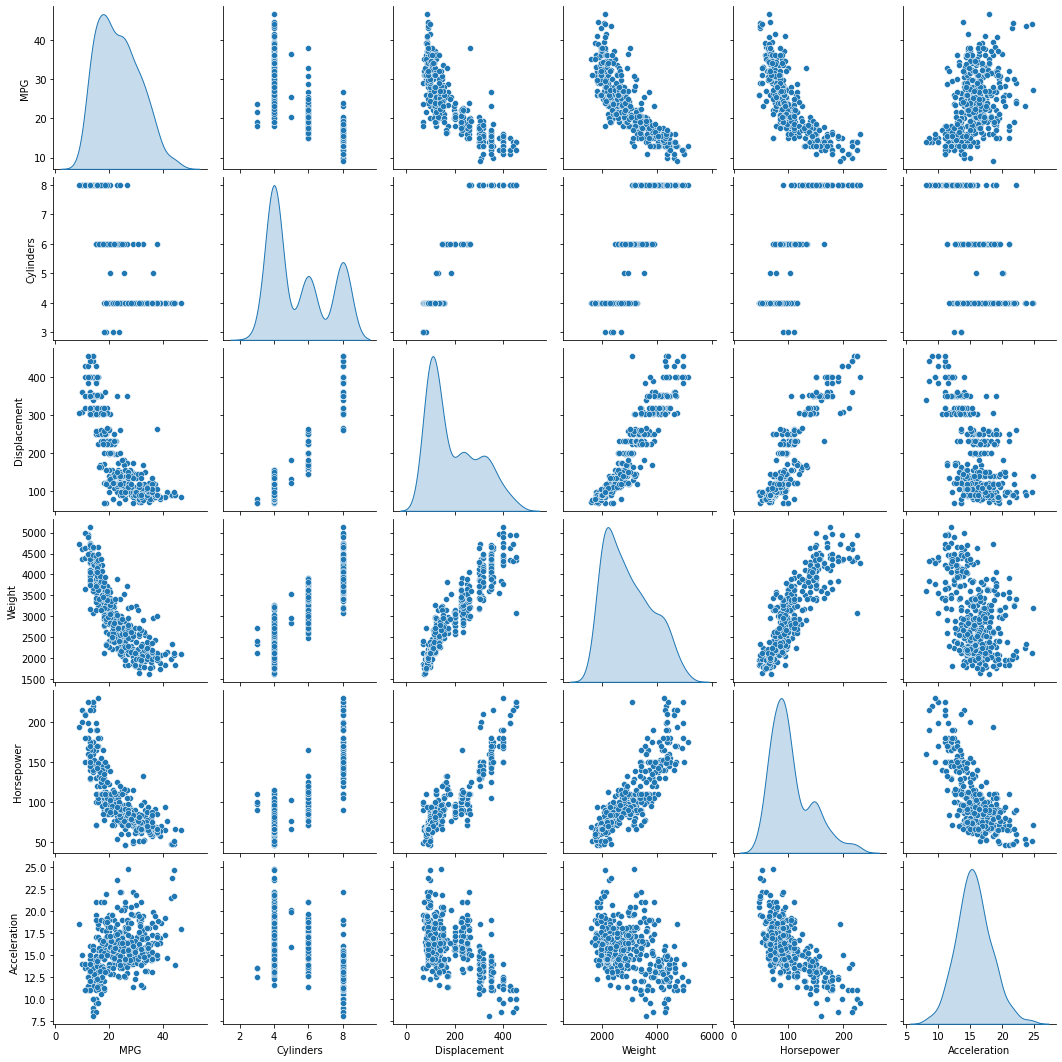

In [12]:
## Correlation Plot 

sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower", "Acceleration"]], diag_kind="kde")

In [13]:
### MPG are negatively correlated with Displacement, HorsePower, Weight and little positively related with Acceleration

## Displacement, Weight and Horsepower are positively correleated 

In [14]:
## Split train and test data 

from sklearn.model_selection import StratifiedShuffleSplit

## Stratified Shuffle splits data into train and test set with equal proportions of classes 

strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strat.split(data, data['Cylinders']):  ## Here we are using Cylinders are Strata to split data
  strat_train_set = data.loc[train_index ]
  strat_test_set = data.loc[test_index]



In [15]:
strat_train_set.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,32.0,4,83.0,61.0,2003.0,19.0,74,3
151,31.0,4,79.0,67.0,2000.0,16.0,74,2
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
48,18.0,6,250.0,88.0,3139.0,14.5,71,1
114,26.0,4,98.0,90.0,2265.0,15.5,73,2


In [16]:
strat_test_set.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
128,15.0,6,250.0,100.0,3336.0,17.0,74,1
100,18.0,6,250.0,88.0,3021.0,16.5,73,1
330,40.9,4,85.0,93.5,1835.0,17.3,80,2
57,24.0,4,113.0,95.0,2278.0,15.5,72,3
160,17.0,6,231.0,110.0,3907.0,21.0,75,1


In [17]:
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)  ## Check the ratio of Cylinderical categories in train

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [18]:
strat_test_set['Cylinders'].value_counts() / len(strat_test_set)  ## Check the ratio of Cylinderical categories in test

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

In [19]:
## Most categories are almost eqaul other that Category 5 . which has very less no.of values 

In [20]:
## Lets look into Origin Column .. It is categorical and has discrete values. 

## Let us conver these discrete values into some country code to implement one hot encoding 

strat_train_set['Origin']  = strat_train_set['Origin'].map({1:'India', 2:'US', 3:'Germany'})

strat_train_set.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
8,14.0,8,455.0,225.0,4425.0,10.0,70,India
349,34.1,4,91.0,68.0,1985.0,16.0,81,Germany
259,20.8,6,200.0,85.0,3070.0,16.7,78,India
262,19.2,8,305.0,145.0,3425.0,13.2,78,India
45,18.0,6,258.0,110.0,2962.0,13.5,71,India
343,39.1,4,79.0,58.0,1755.0,16.9,81,Germany
68,13.0,8,350.0,155.0,4502.0,13.5,72,India
189,15.5,8,304.0,120.0,3962.0,13.9,76,India
117,29.0,4,68.0,49.0,1867.0,19.5,73,US
167,29.0,4,97.0,75.0,2171.0,16.0,75,Germany


In [21]:
strat_test_set['Origin']  = strat_test_set['Origin'].map({1:'India', 2:'US', 3:'Germany'})

strat_test_set.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
159,14.0,8,351.0,148.0,4657.0,13.5,75,India
374,23.0,4,151.0,93.5,3035.0,20.5,82,India
284,20.6,6,225.0,110.0,3360.0,16.6,79,India
213,13.0,8,350.0,145.0,4055.0,12.0,76,India
171,24.0,4,134.0,96.0,2702.0,13.5,75,Germany
184,25.0,4,140.0,92.0,2572.0,14.9,76,India
266,30.0,4,98.0,68.0,2155.0,16.5,78,India
232,16.0,8,351.0,149.0,4335.0,14.5,77,India
330,40.9,4,85.0,93.5,1835.0,17.3,80,US
123,20.0,6,156.0,122.0,2807.0,13.5,73,Germany


In [22]:
## One Hot encoding

train_set = pd.get_dummies(strat_train_set, prefix='', prefix_sep='')

train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,US
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


In [23]:
test_set = pd.get_dummies(strat_test_set, prefix='', prefix_sep='')

test_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,US
128,15.0,6,250.0,100.0,3336.0,17.0,74,0,1,0
100,18.0,6,250.0,88.0,3021.0,16.5,73,0,1,0
330,40.9,4,85.0,93.5,1835.0,17.3,80,0,0,1
57,24.0,4,113.0,95.0,2278.0,15.5,72,1,0,0
160,17.0,6,231.0,110.0,3907.0,21.0,75,0,1,0


In [24]:
## Testing for new variables — Analyze the correlation of each variable with the target variable


data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

In [25]:
## Observation is  acceleration_on_power and acceleration_on_cyl as two new variables which turned out to be 
## more positively correlated than the original variables.



In [26]:
## Let us do Some Data Preparation using sklearn 

# Preprocessing categorical attribute using OnehotEncoder . We have already done using pandas.get_dummies 

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

data_cat_1hot = cat_encoder.fit_transform(data)
data_cat_1hot   # returns a sparse matrix as most of the new columns becomes 0. 

data_cat_1hot.toarray()[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
## Let use create custom feature 

# acc_on_power — Acceleration divided by Horsepower
# acc_on_cyl — Acceleration divided by the number of Cylinders


from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

##custom class inheriting the BaseEstimator and TransformerMixin
class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power  # new optional variable
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix] # required new variable
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl] # returns a 2D array
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data.values)
data_tr_extra_attrs[0]

array([1.80000000e+01, 8.00000000e+00, 3.07000000e+02, 1.30000000e+02,
       3.50400000e+03, 1.20000000e+01, 7.00000000e+01, 1.00000000e+00,
       2.36153846e+00, 4.38000000e+02, 9.23076923e-02, 1.50000000e+00,
       1.14136808e+01, 1.94666667e+02])

In [28]:
## Let us set up data transformation pipeline for numerical and categorical attributes 

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

def num_pipeline_transformer(data):
  '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''

  numerics = ['float64', 'int64']

  num_attrs = data.select_dtypes(include=numerics)

  num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
  return num_attrs, num_pipeline

In [29]:
## Combined Pipeline for both numerical and categorical transformer 

def pipeline_transformer(data):
  '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
  '''
  cat_attrs = ["Origin"]
  num_attrs, num_pipeline = num_pipeline_transformer(data)
  full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
  prepared_data = full_pipeline.fit_transform(data)
  return prepared_data

In [30]:
## Method to convert Origin column with categories 

def preprocess_origin_cols(df):
  df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})    
  return df

In [31]:
## Calling the pipeline transformer 

data = preprocess_origin_cols(data)

data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,displacement_on_power,weight_on_cylinder,acceleration_on_power,acceleration_on_cyl
0,18.0,8,307.0,130.0,3504.0,12.0,70,India,2.361538,438.000,0.092308,1.5000
1,15.0,8,350.0,165.0,3693.0,11.5,70,India,2.121212,461.625,0.069697,1.4375
2,18.0,8,318.0,150.0,3436.0,11.0,70,India,2.120000,429.500,0.073333,1.3750
3,16.0,8,304.0,150.0,3433.0,12.0,70,India,2.026667,429.125,0.080000,1.5000
4,17.0,8,302.0,140.0,3449.0,10.5,70,India,2.157143,431.125,0.075000,1.3125
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,India,1.627907,697.500,0.181395,3.9000
394,44.0,4,97.0,52.0,2130.0,24.6,82,USA,1.865385,532.500,0.473077,6.1500
395,32.0,4,135.0,84.0,2295.0,11.6,82,India,1.607143,573.750,0.138095,2.9000
396,28.0,4,120.0,79.0,2625.0,18.6,82,India,1.518987,656.250,0.235443,4.6500


In [32]:
prepared_data = pipeline_transformer(data)

In [33]:
prepared_data

array([[-0.7064387 ,  1.49819126,  1.0906037 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.09075062,  1.49819126,  1.5035143 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.7064387 ,  1.49819126,  1.19623199, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  0.        ,
         1.        ,  0.        ]])

In [34]:
## Let us start Building Models Now 



### Linear Regression 

from sklearn.linear_model import LinearRegression

data_labels = data['MPG']

print (prepared_data.shape)
data_labels.shape

(398, 16)


(398,)

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)

In [37]:
lin_rmse

2.1906732278799723e-14

In [38]:
## MSE is around 2.19 which is not bad . 

In [39]:

from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(prepared_data, data_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
mpg_predictions = dtree.predict(prepared_data)
dtree_mse = mean_squared_error(data_labels, mpg_predictions)
dtree_rmse = np.sqrt(dtree_mse)

In [41]:
dtree_rmse

0.0

In [42]:
dtree_mse

0.0

In [43]:
## RandomForestRegressor 

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, max_depth=5, )
rf.fit(prepared_data, data_labels)

mpg_predictions = rf.predict(prepared_data)
rf_mse = mean_squared_error(data_labels, mpg_predictions)
rf_rmse = np.sqrt(rf_mse)

print (rf_mse)
print(rf_rmse)

0.02052863132813223
0.14327816068100618


In [44]:
## SVM Regressor 

from sklearn.svm import SVR


svr = SVR(kernel='linear')
svr.fit(prepared_data, data_labels)

mpg_predictions = svr.predict(prepared_data)
svr_mse = mean_squared_error(data_labels, mpg_predictions)
svr_rmse = np.sqrt(rf_mse)

print (svr_mse)
print(svr_rmse)

0.0020036028702485613
0.14327816068100618


In [45]:
## MSE is very much low for SVM 

In [46]:
#### Cross_val_score 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(svr, 
                         prepared_data, 
                         data_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
svr_reg_rmse_scores = np.sqrt(-scores)

In [47]:
svr_reg_rmse_scores

array([0.09172825, 0.02696308, 0.04962345, 0.04076522, 0.03603693,
       0.04183493, 0.05906593, 0.05156985, 0.06615489, 0.06204876])

In [48]:
svr_reg_rmse_scores.mean()

0.052579128612818014

In [49]:
## Fine Tuning Parameters using GridSearchCV 

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [50]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
cv_scores = grid_search.cv_results_

for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores['params']):
  print(np.sqrt(-mean_score), params)



2.250090042516121 {'max_features': 2, 'n_estimators': 3}
2.0187389961595787 {'max_features': 2, 'n_estimators': 10}
1.927646968024315 {'max_features': 2, 'n_estimators': 30}
1.9798530658594748 {'max_features': 4, 'n_estimators': 3}
1.4480650484751658 {'max_features': 4, 'n_estimators': 10}
1.1939461540636662 {'max_features': 4, 'n_estimators': 30}
1.6360956059805405 {'max_features': 6, 'n_estimators': 3}
1.0167539285796008 {'max_features': 6, 'n_estimators': 10}
0.9592263045164855 {'max_features': 6, 'n_estimators': 30}
1.1995824890969975 {'max_features': 8, 'n_estimators': 3}
0.8146554919184062 {'max_features': 8, 'n_estimators': 10}
0.7550380379467236 {'max_features': 8, 'n_estimators': 30}
2.202942347351602 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1.865063599657993 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1.670205985556283 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1.6451230645261459 {'bootstrap': False, 'max_features': 3, 'n_esti

In [52]:
### Checking Feature Importance 

feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances

array([5.56388704e-01, 4.48725752e-02, 4.15487550e-02, 1.57532018e-02,
       3.07481102e-02, 1.80258776e-03, 1.01160723e-02, 3.56045328e-03,
       8.99447196e-03, 1.16078134e-02, 2.02863111e-02, 2.12034526e-03,
       2.51770671e-01, 2.85156382e-04, 3.49223427e-05, 1.09848944e-04])

In [53]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importances), reverse=True)


[('weight_on_cylinder', 0.008994471959427614),
 ('displacement_on_power', 0.003560453281560924),
 ('acceleration_on_power', 0.011607813422200988),
 ('acceleration_on_cyl', 0.020286311102554227),
 ('acc_on_power', 0.0021203452575902053),
 ('acc_on_cyl', 0.2517706707595025),
 ('Weight', 0.030748110177113954),
 ('Model Year', 0.010116072280152212),
 ('MPG', 0.5563887042752874),
 ('Horsepower', 0.015753201844950188),
 ('Displacement', 0.04154875497675705),
 ('Cylinders', 0.04487257523775358),
 ('Acceleration', 0.001802587756991127)]

In [54]:
## acc_on_cyl has more feature_importance . the derived feature 


In [55]:
## Evaluate entire system 


##capturing the best configuration
final_model = grid_search.best_estimator_

##segregating the target variable from test set
X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()


strat_test_set

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
128,15.0,6,250.0,100.0,3336.0,17.0,74,India
100,18.0,6,250.0,88.0,3021.0,16.5,73,India
330,40.9,4,85.0,93.5,1835.0,17.3,80,US
57,24.0,4,113.0,95.0,2278.0,15.5,72,Germany
160,17.0,6,231.0,110.0,3907.0,21.0,75,India
...,...,...,...,...,...,...,...,...
266,30.0,4,98.0,68.0,2155.0,16.5,78,India
389,22.0,6,232.0,112.0,2835.0,14.7,82,India
217,30.0,4,111.0,80.0,2155.0,14.8,77,India
66,17.0,8,304.0,150.0,3672.0,11.5,72,India


In [56]:
print (X_test)

     Cylinders  Displacement  Horsepower  ...  Acceleration  Model Year   Origin
128          6         250.0       100.0  ...          17.0          74    India
100          6         250.0        88.0  ...          16.5          73    India
330          4          85.0        93.5  ...          17.3          80       US
57           4         113.0        95.0  ...          15.5          72  Germany
160          6         231.0       110.0  ...          21.0          75    India
..         ...           ...         ...  ...           ...         ...      ...
266          4          98.0        68.0  ...          16.5          78    India
389          6         232.0       112.0  ...          14.7          82    India
217          4         111.0        80.0  ...          14.8          77    India
66           8         304.0       150.0  ...          11.5          72    India
240          4          97.0        78.0  ...          14.1          77       US

[80 rows x 7 columns]


In [57]:
X_test['Origin'] = X_test["Origin"].map({"India":1, "US":2, "Germany":3})  


In [58]:

#X_test_preprocessed = preprocess_origin_cols(X_test)


In [62]:
X_test_prepared = pipeline_transformer(X_test)



In [64]:
# ##making final predictions

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)



In [65]:
final_rmse

13.355612345044728

In [66]:
# ## Save the tuned model into pickle 

import pickle 

with open('/content/reg_model.pkl', 'wb') as fle:
  pickle.dump(final_model, fle)

print('Final Model Saved ')

Final Model Saved 
